# Clustering
This segment of the tutorial will teach you how to preform waveform similarity clustering in detex. The function used to preform clustering is createCluster of the construct module. The results are then stored in an instance of the ClusterStream class. Let's start by looking at the createCluster function and some important parameters that go into it, then we will look at the ClusterStream class its methods.

## CreateCluster


In [1]:
import detex
version = detex.__version__
print ("Detex version is %s\n" % version)
print (detex.construct.createCluster.__doc__)

Detex version is 1.0.5

 
    Function to create an instance of the ClusterStream class 
    
    Parameters
    -------
    CCreq : float, between 0 and 1
        The minimum correlation coefficient for grouping waveforms. 
        0.0 results in all waveforms grouping together and 1.0 will not
        form any groups.
    fetch_arg : str or detex.getdata.DataFetcher instance
        Fetch_arg of detex.getdata.quickFetch, see docs for details.
    filt : list
        A list of the required input parameters for the obspy bandpass 
        filter [freqmin, freqmax, corners, zerophase].
    stationKey : str or pd.DataFrame
        Path to the station key or DataFrame of station key.
    templateKey : str or pd.DataFrame
        Path to the template key or loaded template key in DataFrame.
    trim : list 
        A list with seconds to trim from events with respect to the origin 
        time reported in the template key. The default value of [10, 120] 
        means each event will be t

As you can see there are a lot of input arguments, and a lot to think about when creating a cluster object. Let me elaborate on some of the arguments you should pay special attention to. 

* fet_arg - make sure to look at the detex.getdata.quickFetch docs for this one. Basically, if you want to use a custom DataFetcher be sure to pass it to the createCluster call here or else detex will try to use a local directory with the default name of EventWaveForms.

* filt - parameters to apply a bandpass filter to the waveform similarity clustering and ALL all detex downstream operations. Make sure to think about this carefully before simply using the default, as the default values are not appropriate for all data sets.

* fillZeros - a parameter for handling data with gaps. If data are not avaliable for the entire range (defined by template key and trim parameter) detex will simply fill zeros so that each trace will have the length defined by the trim parameter. The created cluster instance can then be used later on by detex, although you should be careful going forward to no include a bunch of the zero data in your detector, more on that later. 

* trim - a two element list that defines the length of each waveform. The first element is the time before the origin (as reported in the station key) and the second element is the number of seconds after the reported origin time. 

### Dealing with gaps

In order to see how some of these parameters affect the clustering process we will look at an early UUSS dataset that has some issues with gaps. Here are the stations and templates:



In [2]:
stakey = detex.util.readKey('StationKey.csv', key_type='station')
stakey

,NETWORK,STATION,STARTTIME,ENDTIME,LAT,LON,ELEVATION,CHANNELS
0,UU,IMU,2003-01-03T00:00:00,2004-04-04T00:00:00,38.6332,-113.158,1833,EHZ
1,UU,MSU,2003-01-01T00:00:00,2004-04-04T00:00:00,38.5123,-112.177,2105,EHZ


In [3]:
temkey = detex.util.readKey('TemplateKey.csv', key_type='template')
temkey

,TIME,NAME,LAT,LON,MAG,DEPTH
0,2002-02-01T04-37-29.94,2002-02-01T04-37-29.94,38.616833,-112.463833,1.40,2.82
1,2002-02-02T03-38-36.21,2002-02-02T03-38-36.21,38.575667,-112.714500,1.19,1.14
2,2002-02-22T22-59-28.69,2002-02-22T22-59-28.69,38.558667,-112.460500,2.17,1.72
3,2002-02-22T23-10-36.58,2002-02-22T23-10-36.58,38.538667,-112.455500,0.99,5.82
4,2002-02-26T11-45-48.87,2002-02-26T11-45-48.87,38.527333,-112.467667,1.98,4.01
5,2002-02-26T12-09-47.92,2002-02-26T12-09-47.92,38.558500,-112.456500,2.39,-0.28
6,2002-03-04T02-53-36.92,2002-03-04T02-53-36.92,38.708000,-112.535500,1.43,-0.14
7,2002-03-04T17-13-19.61,2002-03-04T17-13-19.61,38.542333,-112.455333,1.33,1.84
8,2002-03-05T00-32-02.35,2002-03-05T00-32-02.35,38.544667,-112.457667,1.34,2.80
9,2002-03-10T16-03-15.42,2002-03-10T16-03-15.42,38.722000,-112.545000,2.50,-2.97


Because there are so many events it may take some time to get the data. We will skip getting the continuous data because it is not needed for this section of the tutorial. We should probably also start the logger in case we need more info than what is printed to the screen. We will also delete an old logger if there is one.

In [4]:
import os
if os.path.exists("detex_log.log"):
    os.remove("detex_log.log")
detex.setLogger()
detex.getdata.makeDataDirectories(getContinuous=False)

Getting template waveforms
EventWaveForms is not indexed, indexing now
finished makeDataDirectories call


/home/derrick/anaconda/lib/python2.7/site-packages/obspy/mseed/core.py:610: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


Now we will cluster these events while varying the input arguments. Let's start by using the defaults.

In [5]:
%time cl = detex.createCluster() # notice we can call createCluster from the detex level

Cannot remove response without a valid inventoryArg, setting removeResponse to False
Starting IO operations and data checks
2004-07-29T23-09-58.55 on UU.IMU is out of length tolerance, removing
2005-01-02T06-35-22.46 on UU.IMU is out of length tolerance, removing
2005-09-30T13-47-54.79 on UU.IMU is out of length tolerance, removing
2005-11-28T16-18-36.82 on UU.IMU is out of length tolerance, removing
2005-12-21T04-48-05.24 on UU.IMU is out of length tolerance, removing
2004-07-29T23-09-58.55 is fractured or missing data, removing
2004-05-19T20-44-17.41 on UU.MSU is out of length tolerance, removing
2005-01-02T06-35-22.46 on UU.MSU is out of length tolerance, removing
2005-01-14T01-30-48.97 on UU.MSU is out of length tolerance, removing
2005-08-09T06-35-29.44 on UU.MSU is out of length tolerance, removing
2005-09-30T13-47-54.79 on UU.MSU is out of length tolerance, removing
2005-12-21T04-48-05.24 on UU.MSU is out of length tolerance, removing
2006-02-05T23-33-43.00 on UU.MSU is out of l

No handlers could be found for logger "detex.getdata.__init__"


We see the wall time for the createCluster call was around 2 minutes (on my computer). Let's make a function to see how many of the original 220 events were actually used

In [6]:
def check_cluster(cl):
    for c in cl:
        sta = c.station
        num_events = len(c.key)
        print '%s had %d events used in the analysis' % (sta, num_events)
    print '\n'
def get_unused_events(cl, temkey):
    for c in cl:
        sta = c.station
        unused = list(set(temkey.NAME) - set(c.key))
        print 'Unused events on %s are:\n %s\n' % (sta, unused)

def get_info(cl, temkey_in='TemplateKey.csv'):
    temkey = detex.util.readKey(temkey_in, 'template')
    print 'There are %d events in the template key' % len(temkey) 
    check_cluster(cl)
    get_unused_events(cl, temkey)

get_info(cl)

There are 222 events in the template key
UU.IMU had 213 events used in the analysis
UU.MSU had 214 events used in the analysis


Unused events on UU.IMU are:
 ['2005-07-28T16-14-45.72', '2004-07-29T23-09-58.55', '2005-01-02T06-35-22.46', '2010-03-04T00-02-53.67', '2005-07-30T08-58-00.45', '2005-12-21T04-48-05.24', '2005-09-30T13-47-54.79', '2005-11-28T16-18-36.82', '2009-10-07T18-44-39.86']

Unused events on UU.MSU are:
 ['2005-09-30T13-47-54.79', '2004-05-19T20-44-17.41', '2004-07-29T23-09-58.55', '2005-01-02T06-35-22.46', '2005-12-21T04-48-05.24', '2005-01-14T01-30-48.97', '2005-08-09T06-35-29.44', '2006-02-05T23-33-43.00']



Now let's try using fillZeros as True rather than the default of False. This will force each event waveform to be exactly the length defined by the trim parameter by filling with zeros where necessary.  

In [7]:
%time cl2 = detex.createCluster(fillZeros=True)

Cannot remove response without a valid inventoryArg, setting removeResponse to False
Starting IO operations and data checks
performing cluster analysis on UU.IMU
performing cluster analysis on UU.MSU
ccReq for station UU.IMU updated to ccReq=0.500
ccReq for station UU.MSU updated to ccReq=0.500
writing ClusterStream instance as clust.pkl
CPU times: user 2min 43s, sys: 5min 36s, total: 8min 20s
Wall time: 2min 24s


In [8]:
get_info(cl2)

There are 222 events in the template key
UU.IMU had 218 events used in the analysis
UU.MSU had 222 events used in the analysis


Unused events on UU.IMU are:
 ['2005-07-28T16-14-45.72', '2009-10-07T18-44-39.86', '2010-03-04T00-02-53.67', '2005-07-30T08-58-00.45']

Unused events on UU.MSU are:
 []



So setting fill_zeros to True caused detex to use all the events on MSU and all but four on IMU. The four IMU events that went unused were probably due to missing waveforms. We can verify this by looking in the log for indications the that the data were not available to download.

In [9]:
log = detex.util.readLog()
log

,Time,Mod,Level,Msg
0,"2015-12-14 22:26:20,753",detex,INFO,"Starting logging, path to log file: /home/derr..."
1,"2015-12-14 22:26:21,050",detex.getdata.makeDataDirectories,INFO,Getting template waveforms
2,"2015-12-14 22:26:22,396",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
3,"2015-12-14 22:26:22,402",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
4,"2015-12-14 22:26:22,407",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
5,"2015-12-14 22:26:22,413",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
6,"2015-12-14 22:26:22,419",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
7,"2015-12-14 22:26:22,424",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
8,"2015-12-14 22:26:22,430",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."
9,"2015-12-14 22:26:23,903",detex.getdata._dataCheck,WARNING,"Found non-int sampling_rates, rounded to neare..."


### Time Trials
If you are trying to perform waveform clustering on a large data set it may be worth your time to understand how varying certain parameters can affect runtimes. Let's isolate a few variables and compare run times from the default values. If you are running this on your computer at home it may take some time, skip ahead if you aren't interested. 

In [10]:
# Setup code for time trials
import time
def timeit(func): # decorator for timing function calls
    def wraper(*args, **kwargs):
        t = time.time()
        out = func(*args, **kwargs)
        return (time.time() - t, out)
    return wraper

@timeit
def time_cluster(*args, **kwargs):
    detex.createCluster(*args, **kwargs)


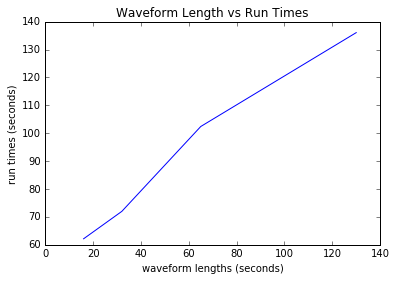

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
detex.verbose = False # silence detex

cols = ['waveform_duration', 'run_time']
df = pd.DataFrame(columns=cols)

trims = [(10, 120), (5, 60), (2, 30), (1, 15)]

for trim in trims:
    rt = time_cluster(trim=trim)[0]
    ser = pd.Series([sum(trim), rt], index=cols)
    df.loc[len(df)] = ser
    
plt.plot(df.waveform_duration, df.run_time)
plt.title("Waveform Length vs Run Times")
plt.ylabel("run times (seconds)")
plt.xlabel("waveform lengths (seconds)")

    
    

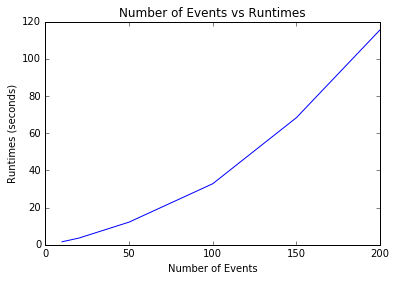

In [12]:
cols = ['num_events', 'run_time']
df = pd.DataFrame(columns=cols)

temkey = detex.util.readKey("TemplateKey.csv", "template")

temkey_lengths = [10, 20, 50, 100, 150, 200]

for tkl in temkey_lengths:
    temkey2 = temkey.copy()
    
    rt = time_cluster(templateKey=temkey2[:tkl+1])[0]
    ser = pd.Series([tkl, rt], index=cols)
    df.loc[len(df)] = ser
    
plt.plot(df.num_events, df.run_time)
plt.title("Number of Events vs Runtimes")
plt.xlabel("Number of Events")
plt.ylabel("Runtimes (seconds)")




Although a bit more complicated than this, we could qualitatively estimate that changing the waveform length scales the runtime by approximately N (linearly with time) whereas the number of events scales the runtime by approximately N<sup>2</sup> (quadratic with time). Let's see how decimating the data changes the runtimes. 


In [13]:
# Test various decimation factors
rt_base = time_cluster()[0]
rt_decimate = time_cluster(decimate=2)[0]
print("Base run time: %.02f, Decimated run time: %.02f" % (rt_base, rt_decimate))


Base run time: 136.88, Decimated run time: 101.74


Interestingly, this didn't seem to make much of a difference. The original data were sampled at 100 Hz so using a decimation factor of 2 would have reduced the sampling rate to 50 Hz. Since we left the default bandpass filter (1.0 to 10.0 Hz) it might make sense to use a decimation factor of 4 in order to bring the sampling rate down to 25 Hz. 

## ClusterStream and Cluster Classes

The ClusterStream and Cluster classes are used to control and visualize waveform similarity clustering. These classes are required to define the subspaces used in the detection process.

The ClusterStream is a container for one or more Cluster instances. There is a cluster instance for each station, although most attributes are accessible from the ClusterStream level. Let's take create a ClusterStream instance and take a closer look.  

In [14]:
import detex # reimport so we can start here
detex.verbose = False
cl = detex.createCluster()

The bulk of the information for the ClusterStream is stored in the trdf attribute, which, of course, is a pandas DataFrame.

In [15]:
cl.trdf

,Station,Link,CCs,Lags,Subsamp,Events,Stats
0,UU.IMU,"[[194.0, 195.0, 0.00121253182149, 2.0], [105.0...",1 2 3 4 ...,1 2 3 4 5 6 7 8...,1 2 3 4 ...,"[2002-02-01T04-37-29.94, 2002-02-02T03-38-36.2...","{u'2002-11-09T21-38-33.05': {u'Nc': 1, u'sampl..."
1,UU.MSU,"[[195.0, 196.0, 0.0035685379758, 2.0], [158.0,...",1 2 3 4 ...,1 2 3 4 5 6 7 ...,1 2 3 4 ...,"[2002-02-01T04-37-29.94, 2002-02-02T03-38-36.2...","{u'2002-11-09T21-38-33.05': {u'Nc': 1, u'sampl..."


In this DataFrame there is a row for each station. The columns are:

| Column | Description |
|:-----:| :---------: |
| CCs | A matrix of max correlation coef for each station pair |
| Lags | A matrix of lag samples corresponding to the highest correlation coef |
| Subsamp | The decimal fraction determined by subsample extrapolation |
| Events | The name of the events used |
| Stats | Selected stats of the events |

The CCs and Lags are DataFrames that have indices and rows that correspond to an element in the Events list. This is probably best illustrated by an example. Let's say we want to find the max correlation ceof. between two events and the corresponding number of samples that would be required to shift the first event to line up with the second. First, we need to find where the events we want to find occur in the events list, then we can index them in the lags and ccs.


In [16]:
# Here are two events in the list
ev1 = '2010-07-10T08-57-51.25'
ev2 = '2014-11-29T14-18-04.87'
events = list(cl.trdf.loc[0, 'Events']) # cast from np array to list
# Find the index where each event occurs in the list
ev1_ind = events.index(ev1)
ev2_ind = events.index(ev2)
print ("%s index is %d, %s index is %d" % (ev1, ev1_ind, ev2, ev2_ind))



2010-07-10T08-57-51.25 index is 125, 2014-11-29T14-18-04.87 index is 210


In [17]:
cc = cl.trdf.loc[0, 'CCs']
lags = cl.trdf.loc[0, 'Lags']
coef = cc.loc[ev1_ind, ev2_ind]
lag = lags.loc[ev1_ind, ev2_ind]
print (coef, lag)
# events

(0.12697600464301972, 263)


### Visualization Methods
The ClusterStream has several methods for visualizing. We can create a simple similarity matrix.

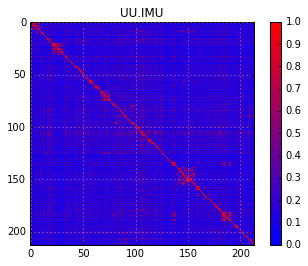

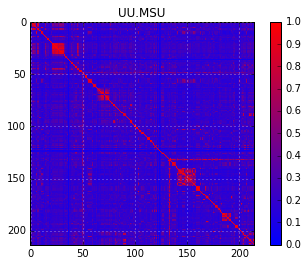

In [18]:
cl.simMatrix()

By default the events (x and y axis) are ordered based on origin time. We can also plot them based on the groups the events best fit in. 

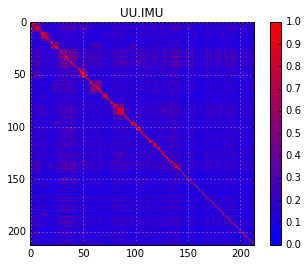

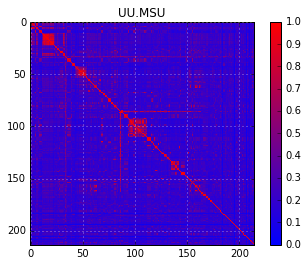

In [19]:
cl.simMatrix(groupClusts=True)

We can visualize and change the clustering structure for each station with the dendro and updateReqCC methods, just as in the intro tutorial. 

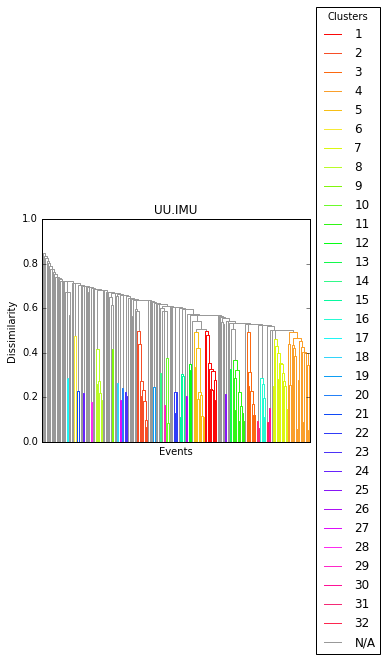

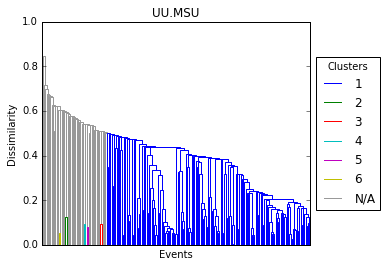

In [20]:
cl.dendro()

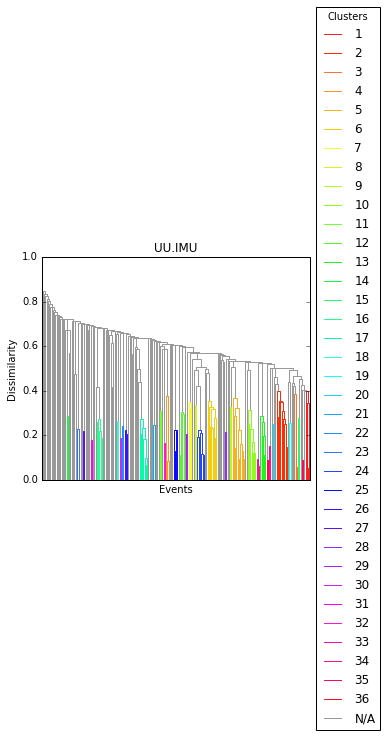

In [21]:
cl[0].updateReqCC(.6)
cl[0].dendro()

We can plot the spatial relations of the events with the plotEvents method. This is used to get a quick and dirty idea of event locations and depths; it still needs a lot of work before it will produce presentable plots. The following is not the best example of a meaningful plot because there are so many colors and different groups but plotEvents can be useful, especially on smaller datasets. 

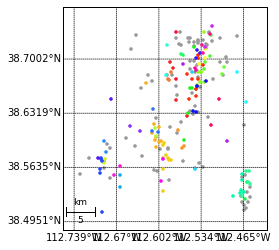

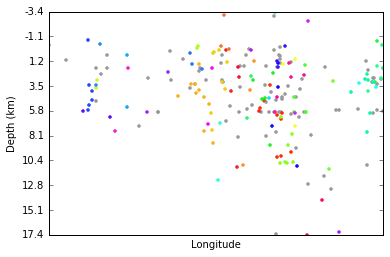

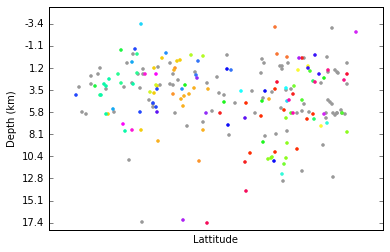

In [22]:
cl[0].plotEvents()

# Next section
The [next section](../SubspaceDetection/subspace_detection1.md) covers subspace detection.